In [1]:
%matplotlib notebook
import yt
yt.toggle_interactivity()

size = 3.54 
dpi = 600 

Using matplotlib backend: nbAgg


In [2]:
import numpy as np 
import src.animation as animation
import src.hybrid_scheme as hybrid_scheme
import src.tests as tests
config, psi, density, phase = animation.loadRun("runs/3d/hybrid_scheme_15.npz")


solver = hybrid_scheme.HybridScheme(config, tests.cosmological3D)
solver.density = density 
solver.phase = phase
solver.useHybrid = True
solver.updateTree()

Constructing hybrid scheme scheme
Setting up fourier grid
Enabling multiprocessing via pool with 32 processes
Set up nD binary tree with N = 128
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of ty

In [3]:
solver.config

{'dimension': 3,
 'resolution': 128,
 'domainSize': 12,
 'usePeriodicBC': True,
 'ghostBoundarySize': 3,
 't0': 1.5999999999999988,
 'tEnd': 2.5,
 'dt': 0.001,
 'slowDown': 1,
 'fps': 10,
 'useAdaptiveTimestep': True,
 'cfl': 1,
 'maximumNumberOfTimesteps': 100000,
 'timeOrder': 2,
 'stencilOrder': 4,
 'fluxLimiter': 'MINMOD',
 'gravity': 1,
 'useCosmology': False,
 'nThreads': 32,
 'externalPotential': None,
 'debug': False,
 'outputTimestep': True,
 'useHybrid': True,
 'useAdaptiveSubregions': True,
 'subregions': [[0.3, 0.3, 0.1, 0.1], [0.3, 0.3, 0.4, 0.4]],
 'windowUpdateFrequency': 100,
 'WindowSize': 0.5,
 'mode': 0,
 'enoOrder': 1,
 'rhoOrder': 1,
 'modifiedPQN': 3,
 'xlim': [0, 10],
 'densityYlim': [0, 1],
 'phaseYlim': [-50, 50],
 'plotDensityLogarithm': True,
 'plotPhaseMod2': False,
 'dpi': 80,
 'artificialDiffusion': 1,
 'fluxMode': 0,
 'SPeriodicBoundary': True,
 'fluidMode': 0,
 'integrationOrigin': [0, 0],
 'useSlopeLimiting': True,
 'maxSpeedC': 6.4}

In [53]:
solver.binaryTree.getWaveVolumeFraction()

0.115234375

In [5]:
subregions = []
solver.binaryTree.getSubregions(subregions)

The function getSubregions returns a list of tuples containing the pixel position, the pixel width and the information whether we employ the phase or the wave scheme for all subregions. 

In [55]:
subregions

[(array([0, 0, 0]), 16, True),
 (array([ 0, 16,  0]), 16, True),
 (array([16,  0,  0]), 16, True),
 (array([16, 16,  0]), 16, True),
 (array([ 0,  0, 16]), 16, False),
 (array([ 0, 16, 16]), 16, False),
 (array([16,  0, 16]), 16, True),
 (array([16, 16, 16]), 16, True),
 (array([ 0, 32,  0]), 32, False),
 (array([32,  0,  0]), 16, False),
 (array([32, 16,  0]), 16, True),
 (array([48,  0,  0]), 16, False),
 (array([48, 16,  0]), 16, False),
 (array([32,  0, 16]), 16, False),
 (array([32, 16, 16]), 16, True),
 (array([48,  0, 16]), 16, False),
 (array([48, 16, 16]), 16, True),
 (array([32, 32,  0]), 32, False),
 (array([ 0,  0, 32]), 32, False),
 (array([ 0, 32, 32]), 16, False),
 (array([ 0, 48, 32]), 16, False),
 (array([16, 32, 32]), 16, False),
 (array([16, 48, 32]), 16, True),
 (array([ 0, 32, 48]), 16, False),
 (array([ 0, 48, 48]), 16, False),
 (array([16, 32, 48]), 16, True),
 (array([16, 48, 48]), 16, True),
 (array([32,  0, 32]), 16, False),
 (array([32, 16, 32]), 16, False),


In the next step, we create a python dictionary to tell yt how the grid is defined. 

In [7]:
mod2phase = np.angle(np.exp(1j*phase))

In [8]:
N = 128
grid_data = []
for subregion in subregions:
    position, width, usesWaveScheme = subregion
    #level = int(np.log(128 / width)/np.log(2))
    #print(level, width)
    if usesWaveScheme:
        level = 1
    else:
        level = 0
    indices = np.ix_(*[np.arange(position[i], position[i] + width) for i in range(3)])
    grid_data.append(
        dict(
            left_edge  = position/N,
            right_edge = (position + width) / N,
            level      = level,
            dimensions = [width, width, width],
            density    = density[indices],
            phase      = phase[indices],
            mod2phase  = mod2phase[indices]
        )
    )


In [9]:
data = dict(density = (density, ""), phase = (phase, ""), mod2phase = (mod2phase, ""))

#ds = yt.load_uniform_grid(data, density.shape, nprocs=64)
ds = yt.load_amr_grids(grid_data, density.shape, length_unit = "code_length")

yt : [INFO     ] 2022-05-13 22:22:53,762 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-13 22:22:53,765 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-05-13 22:22:53,767 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-13 22:22:53,772 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-05-13 22:22:53,774 Parameters: cosmological_simulation   = 0


In [68]:

slc = yt.SlicePlot(ds, "x", ("stream", "mod2phase"), center=[.5, 0.5, 0.5])
slc.set_cmap(("stream", "mod2phase"), "inferno")
#slc.set_xlabel("y")
#slc.set_xlabel("z")
#slc.set_figure_size(size)
slc.set_log(("stream", "mod2phase"), False)

slc.annotate_grids(min_level = 1, edgecolors="w")
slc.save()

yt : [INFO     ] 2022-05-13 17:01:59,601 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 17:01:59,602 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 17:01:59,608 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 17:01:59,610 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 17:01:59,614 Making a fixed resolution buffer of (('stream', 'mod2phase')) 800 by 800
yt : [WARNING  ] 2022-05-13 17:01:59,686 Plotting ('stream', 'mod2phase'): Both positive and negative values. Min = -3.1160770694871798 dimensionless, Max = 3.140105876223311 dimensionless.
yt : [WARNING  ] 2022-05-13 17:01:59,687 Switching to symlog colorbar scaling.
yt : [INFO     ] 2022-05-13 17:02:00,244 Saving plot AMRGridData_Slice_x_mod2phase.png


['AMRGridData_Slice_x_mod2phase.png']

In [19]:
xs = [0.1, 0.3, 0.5, 0.7]
for x in xs:
    slc = yt.SlicePlot(ds, "x", ("gas", "density"), center=[x, 0.5, 0.5])
    slc.set_cmap(("gas", "density"), "inferno")
    slc.set_xlabel("y")
    slc.set_ylabel("z")
    slc.set_colorbar_label(field = ("gas", "density"), label="Density")
    #slc.set_figure_size(size)
    slc.annotate_grids(min_level = 1, edgecolors="w")
    slc.save(str(x))

    slc = yt.SlicePlot(ds, "x", ("stream", "phase"), center=[x, 0.5, 0.5])
    slc.set_cmap(("stream", "phase"), "magma")
    slc.set_log(("stream", "phase"), False)
    slc.set_xlabel("y")
    slc.set_ylabel("z")
    #slc.set_figure_size(size)
    slc.annotate_grids(min_level = 1, edgecolors="w")
    slc.save(str(x))

yt : [INFO     ] 2022-05-13 16:23:09,528 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:09,530 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:09,531 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:09,532 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:09,536 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 16:23:09,991 Saving plot 0.1_Slice_x_density.png
yt : [INFO     ] 2022-05-13 16:23:10,379 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:10,380 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:10,382 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:10,383 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:10,386 Making a fixed resolution buffer of (('stream', 'phase')) 800 by 800
yt : [WARNING  ] 2022-05-13 16:23:10,460 Plotting ('stream', 'phase'): Both positive and negative values. Min = -4.7614123289648616 dimensionless, Max = 4.394927318501927 dimen

In [20]:
ys = [0.2]
for y in ys:
    slc = yt.SlicePlot(ds, "y", ("gas", "density"), center=[0.5, y, 0.5])
    slc.set_cmap(("gas", "density"), "inferno")
    slc.set_xlabel("z")
    slc.set_ylabel("x")
    slc.set_colorbar_label(field = ("gas", "density"), label="Density")
    #slc.set_figure_size(size)
    slc.annotate_grids(min_level = 1, edgecolors="w")
    slc.save(str(y))

    slc = yt.SlicePlot(ds, "y", ("stream", "phase"), center=[0.5, y, 0.5])
    slc.set_cmap(("stream", "phase"), "magma")
    slc.set_log(("stream", "phase"), False)
    slc.set_xlabel("z")
    slc.set_ylabel("x")
    #slc.set_figure_size(size)
    slc.annotate_grids(min_level = 1, edgecolors="w")
    slc.save(str(x))

yt : [INFO     ] 2022-05-13 16:23:17,419 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:17,434 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:17,436 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:17,437 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:17,442 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 16:23:17,972 Saving plot 0.2_Slice_y_density.png
yt : [INFO     ] 2022-05-13 16:23:18,453 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:18,454 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:18,455 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:18,456 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:18,460 Making a fixed resolution buffer of (('stream', 'phase')) 800 by 800
yt : [WARNING  ] 2022-05-13 16:23:18,537 Plotting ('stream', 'phase'): Both positive and negative values. Min = -6.320481138623078 dimensionless, Max = 7.865406610607903 dimens

In [21]:

zs = [0.1, 0.4]
for z in zs:
    slc = yt.SlicePlot(ds, "z", ("gas", "density"), center=[0.5, 0.5, z])
    slc.set_cmap(("gas", "density"), "inferno")
    slc.set_xlabel("x")
    slc.set_ylabel("y")
    slc.set_colorbar_label(field = ("gas", "density"), label="Density")
    #slc.set_figure_size(size)
    slc.annotate_grids(min_level = 1, edgecolors="w")
    slc.save(str(z))

    slc = yt.SlicePlot(ds, "z", ("stream", "phase"), center=[0.5, 0.5, z])
    slc.set_cmap(("stream", "phase"), "magma")
    slc.set_log(("stream", "phase"), False)
    slc.set_xlabel("x")
    slc.set_ylabel("y")
    #slc.set_figure_size(size)
    slc.annotate_grids(min_level = 1, edgecolors="w")
    slc.save(str(z))

yt : [INFO     ] 2022-05-13 16:23:22,564 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:22,565 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:22,567 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:22,571 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:22,574 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 16:23:23,038 Saving plot 0.1_Slice_z_density.png
yt : [INFO     ] 2022-05-13 16:23:23,696 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:23,697 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:23,700 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:23,701 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 16:23:23,705 Making a fixed resolution buffer of (('stream', 'phase')) 800 by 800
yt : [WARNING  ] 2022-05-13 16:23:23,790 Plotting ('stream', 'phase'): Both positive and negative values. Min = -4.433553342468644 dimensionless, Max = 6.599201841826231 dimens

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

import yt

fig = plt.figure()

# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
# These choices of keyword arguments produce two colorbars, both drawn on the
# right hand side.  This means there are only two colorbar axes, one for Density
# and another for temperature.  In addition, axes labels will be drawn for all
# plots.
grid = AxesGrid(
    fig,
    (0.075, 0.075, 0.85, 0.85),
    nrows_ncols=(2, 3),
    axes_pad=0,
    share_all=True,
    cbar_location="right",
    cbar_mode="edge",
    cbar_size="5%",
    cbar_pad="0%",
)

cuts = ["x", "y", "z", "x", "y", "z"]
positions = [[0.3, 0.5, 0.5], [0.5, 0.2, 0.5], [0.5, 0.5, 0.1], [0.3, 0.5, 0.5], [0.5, 0.2, 0.5], [0.5, 0.5, 0.1]]
fields = [
    ("gas", "density"),
    ("gas", "density"),
    ("gas", "density"),
    ("stream", "phase"),
    ("stream", "phase"),
    ("stream", "phase"),
]

xlabels    = ["y", "z", "x", "y", "z", "x"]
ylabels    = ["z", "x", "y", "z", "x", "y"]
cbarlabels = ["density", "density", "density", None, None, None]
for i, (direction, field) in enumerate(zip(cuts, fields)):
    # Load the data and create a single plot
    p = yt.SlicePlot(ds, direction, field, center=positions[i])
    p.set_cmap(("gas", "density"), "inferno")
    p.set_cmap(("stream", "phase"), "inferno")
    p.set_log(("stream", "phase"), False)
    
    p.set_colorbar_label(field = ("gas", "density"), label=r"density $\rho$")
    p.set_colorbar_label(field = ("stream", "phase"), label=r"phase $S$")
    p.set_xlabel("")
    p.set_ylabel("")
    p.annotate_grids(min_level = 1, edgecolors="w")
    
    p.set_minorticks("all", False)
    # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.axes.xaxis.set_visible(False)
    plot.axes.yaxis.set_visible(False)


    # Since there are only two colorbar axes, we need to make sure we don't try
    # to set the temperature colorbar to cbar_axes[4], which would if we used i
    # to index cbar_axes, yielding a plot without a temperature colorbar.
    # This unnecessarily redraws the Density colorbar three times, but that has
    # no effect on the final plot.
    if field == ("gas", "density"):
        plot.cax = grid.cbar_axes[0]
    
    elif field == ("stream", "phase"):
        plot.cax = grid.cbar_axes[1]

    # Finally, redraw the plot.
    p._setup_plots()

ax1, ax2, ax3, ax4, ax5, ax6 = grid.axes_all
fig.align_ylabels([ax3, ax6])

plt.savefig("multiplot_2x2_coordaxes_slice.pdf", bbox_inches='tight')


<IPython.core.display.Javascript object>

yt : [INFO     ] 2022-05-13 22:32:00,074 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,075 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,076 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,077 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,081 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 22:32:00,991 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,993 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,995 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:00,997 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:01,000 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 22:32:01,489 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:01,490 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:01,492 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 22:32:01,493 ylim = 0.000000

In [271]:

prj = yt.ProjectionPlot(ds, axis, ("gas", "density"))
prj.set_cmap(("gas", "density"), "inferno")
#slc.set_xlabel("y")
#slc.set_xlabel("z")
#slc.set_figure_size(size)
#prj.annotate_grids()#edgecolors="w", alpha=1)
prj.set_axes_unit("")
prj.show()

yt : [INFO     ] 2022-05-13 15:54:47,152 Projection completed
yt : [INFO     ] 2022-05-13 15:54:47,153 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 15:54:47,154 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 15:54:47,156 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 15:54:47,157 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 15:54:47,162 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-16:
Process ForkPoolWorker-6:
Process ForkPoolWorker-30:
Process ForkPoolWorker-24:
Process ForkPoolWorker-31:
Process ForkPoolWorker-25:
Process ForkPoolWorker-11:
Process ForkPoolWorker-17:
Process ForkPoolWorker-9:
Process ForkPoolWorker-28:
Process ForkPoolWorker-3:
Process ForkPoolWorker-10:
Process ForkPoolWorker-12:
Process ForkPoolWorker-20:
Process ForkPoolWorker-8:
Process ForkPoolWorker-21:
Process ForkPoolWorker-32:
Process ForkPoolWorker-1:
Process ForkPoolWorker-13:
Process ForkPoolWorker-14:
Process ForkPoolWorker-26:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-19:
Process ForkPoolWorker-23:
Process ForkPoolWorker-18:
Process ForkPoolWorker-15:
Process ForkPoolWorker-27:
Process ForkPoolWorker-29:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last

: 

: 

In [114]:
axes = ["x", "y", "z"]
for axis in axes:
    prj = yt.ProjectionPlot(ds, axis, ("gas", "density"))
    prj.set_cmap(("gas", "density"), "inferno")
    #slc.set_xlabel("y")
    #slc.set_xlabel("z")
    #slc.set_figure_size(size)
    prj.annotate_grids()#edgecolors="w", alpha=1)
    prj.save()

yt : [INFO     ] 2022-05-13 14:39:55,095 Projection completed
yt : [INFO     ] 2022-05-13 14:39:55,096 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:55,098 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:55,102 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:55,104 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:55,107 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 14:39:55,836 Saving plot AMRGridData_Projection_x_density.png
yt : [INFO     ] 2022-05-13 14:39:56,976 Projection completed
yt : [INFO     ] 2022-05-13 14:39:56,977 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:56,980 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:56,982 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:56,986 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-05-13 14:39:56,990 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-13 14:39:57,699

In [10]:


#Find the min and max of the field
mi, ma = ds.all_data().quantities.extrema('density')
#Reduce the dynamic range
mi = mi.value + 1.5e7
ma = ma.value - 0.81e7



In [11]:


# Choose a vector representing the viewing direction.
L = [0.5, 0.5, 0.5]
# Define the center of the camera to be the domain center
c = ds.domain_center[0]
# Define the width of the image
W = 1.5*ds.domain_width[0]
# Define the number of pixels to render
Npixels = 512



In [12]:
sc = yt.create_scene(ds, ('gas', 'density'))

/home/xerox/anaconda3/lib/python3.8/site-packages/yt/visualization/volume_rendering/transfer_function_helper.py:72: VisibleDeprecationWarning: The requested field name 'density' is ambiguous and corresponds to any one of the following field types:
 {'gas'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  self.log = self.ds._get_field_info(field).take_log
/home/xerox/anaconda3/lib/python3.8/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'density' is ambiguous and corresponds to any one of the following field types:
 {'gas'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/home/xerox/anaconda3/lib/python3.8/site-packages/yt/data_objects/data_co

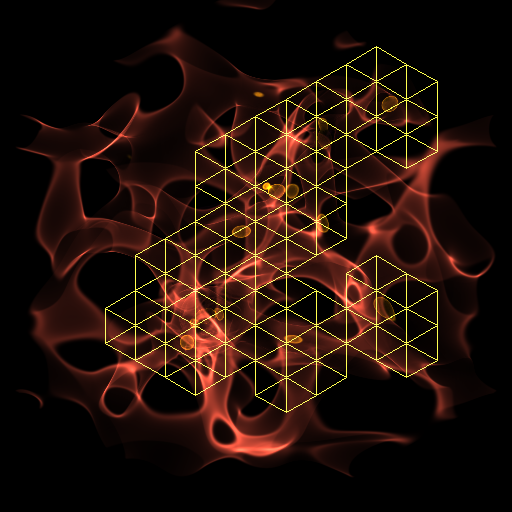

In [13]:

from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper

sc.annotate_grids(ds.all_data(), alpha=0.005, min_level = 1)

tfh = TransferFunctionHelper(ds)
tfh.set_field('density')
tfh.set_log(True)
tfh.set_bounds()
tfh.build_transfer_function()
tfh.tf.add_layers(6, colormap='inferno')

#sc.annotate_grids(ds.all_data(), alpha=1, min_level = 1)
# Grab the first render source and set it to use the new transfer function
render_source = sc.get_source()
render_source.transfer_function = tfh.tf

# Make underdense regions appear opaque
render_source.tfh.grey_opacity = True

# Plot the transfer function, along with the CDF of the density field to
# see how the transfer function corresponds to structure in the CDF
render_source.tfh.plot("transfer_function.png", profile_field=("gas", "density"))


sc.render()
sc.show(sigma_clip=4.0)

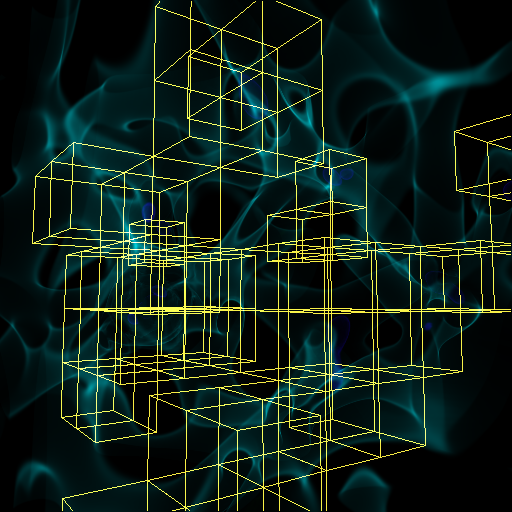

In [186]:
cam.yaw(0.3)
sc.show(sigma_clip=4.0)

yt : [INFO     ] 2022-05-13 17:57:01,875 Rendering scene (Can take a while).
yt : [INFO     ] 2022-05-13 17:57:03,568 Creating volume


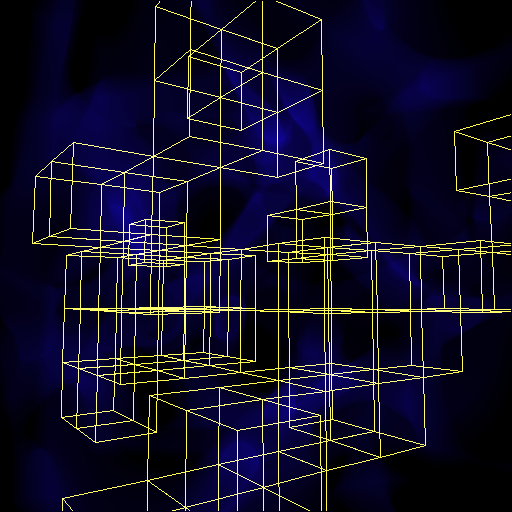

In [182]:

from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper

sc.annotate_grids(ds.all_data(), alpha=0.01, min_level = 1)

source = sc[0]
source.set_field(("gas", "density"))
source.set_log(True)

bounds = (.001, 1000)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(bounds)

tf.sample_colormap(np.log10(1), w=0.01, colormap="inferno")

source.tfh.tf = tf
source.tfh.bounds = bounds

# Plot the transfer function, along with the CDF of the density field to
# see how the transfer function corresponds to structure in the CDF
source.tfh.plot("transfer_function.png", profile_field=("gas", "density"))


sc.render()
sc.show(sigma_clip=4.0)

In [32]:


cam = sc.add_camera(ds, lens_type='perspective')

# Standing at (x=0.05, y=0.5, z=0.5), we look at the area of x>0.05 (with some open angle
# specified by camera width) along the positive x direction.
#cam.position = ds.arr([-0.8, 0.6, 0.4], 'code_length')
#cam.position = ds.arr([-0.8, 0.9, 0.4], 'code_length')
cam.position = ds.arr([-0.8, 0.9, 0.4], 'code_length')

#normal_vector = [1., 0., 0]
normal_vector = [1., 0., 0]
#north_vector = [0., 0., 1.]
north_vector = [0., 0., 1.]
cam.switch_orientation(normal_vector=normal_vector,
                       north_vector=north_vector)

# The width determines the opening angle
cam.set_width(ds.domain_width * .5)
cam.yaw(-np.pi/6)
#cam.set_resolution((1440, 1240))
print (sc.camera)



<Camera Object>:
	position:[-0.8  0.9  0.4] unitary
	focus:[0.5 0.5 0.5] code_length
	north_vector:[0. 0. 1.] dimensionless
	width:[0.5 0.5 0.5] unitary
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.71650635 0.375      0.5       ] code_length code_length


In [33]:
sc.render()

yt : [INFO     ] 2022-05-13 22:33:00,570 Rendering scene (Can take a while).


ImageArray([[[2.34900966e-003, 8.52011621e-004, 6.30028067e-004,
              1.00000000e+000],
             [2.47861118e-003, 8.99057055e-004, 6.64820373e-004,
              1.00000000e+000],
             [2.38896686e-003, 8.66515946e-004, 6.40754679e-004,
              1.00000000e+000],
             ...,
             [1.33996091e-125, 3.44535244e-126, 9.22430797e-126,
              1.00000000e+000],
             [1.55007387e-127, 3.98560194e-128, 1.06707283e-127,
              1.00000000e+000],
             [2.27165782e-131, 5.84096279e-132, 1.56381214e-131,
              1.00000000e+000]],

            [[2.36774277e-003, 8.58811529e-004, 6.35056894e-004,
              1.00000000e+000],
             [2.46156191e-003, 8.92867824e-004, 6.60243109e-004,
              1.00000000e+000],
             [2.34387347e-003, 8.50147740e-004, 6.28649701e-004,
              1.00000000e+000],
             ...,
             [2.63586739e-125, 6.77743063e-126, 1.81453446e-125,
              1.00000000

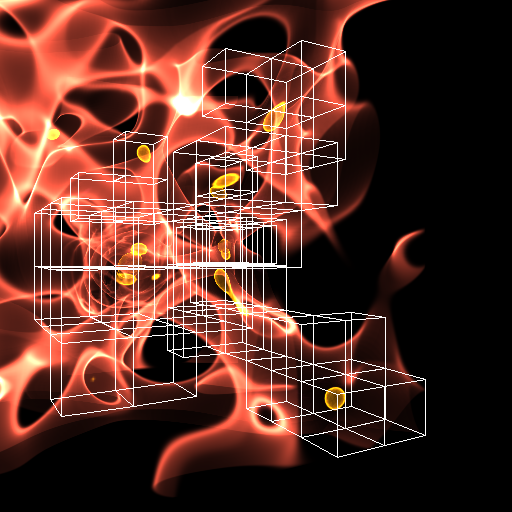

In [37]:
sc.show(sigma_clip=0.4)

In [28]:
sc.save(sigma_clip=1.5)

yt : [WARNING  ] 2022-05-13 22:28:15,158 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-05-13 22:28:15,160 Rendering scene (Can take a while).
yt : [INFO     ] 2022-05-13 22:29:20,043 Saving rendered image to AMRGridData_Render_density.png


In [245]:

sc.render()

ImageArray([[[0.00000000e+000, 2.57990007e-003, 2.72919723e-003,
              1.00000000e+000],
             [0.00000000e+000, 2.72222293e-003, 2.87974422e-003,
              1.00000000e+000],
             [0.00000000e+000, 2.62377944e-003, 2.77561221e-003,
              1.00000000e+000],
             ...,
             [0.00000000e+000, 2.29240851e-125, 4.83324585e-127,
              1.00000000e+000],
             [0.00000000e+000, 2.65187029e-127, 5.59112438e-129,
              1.00000000e+000],
             [0.00000000e+000, 3.88635793e-131, 8.19388136e-133,
              1.00000000e+000]],

            [[0.00000000e+000, 2.60047208e-003, 2.75095806e-003,
              1.00000000e+000],
             [0.00000000e+000, 2.70350031e-003, 2.85993981e-003,
              1.00000000e+000],
             [0.00000000e+000, 2.57425946e-003, 2.72323049e-003,
              1.00000000e+000],
             ...,
             [0.00000000e+000, 4.50944857e-125, 9.50758711e-127,
              1.00000000

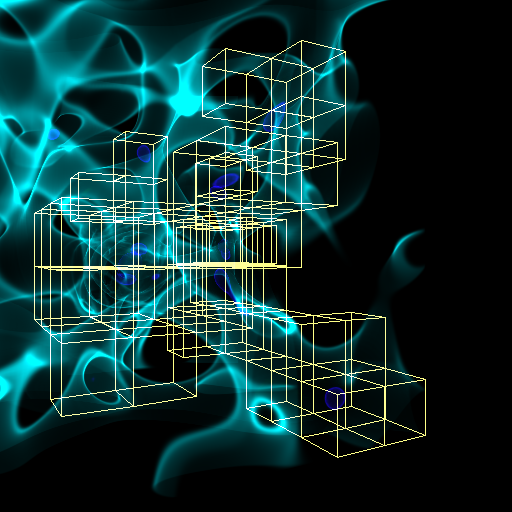

In [248]:
sc.show(sigma_clip=1.5)

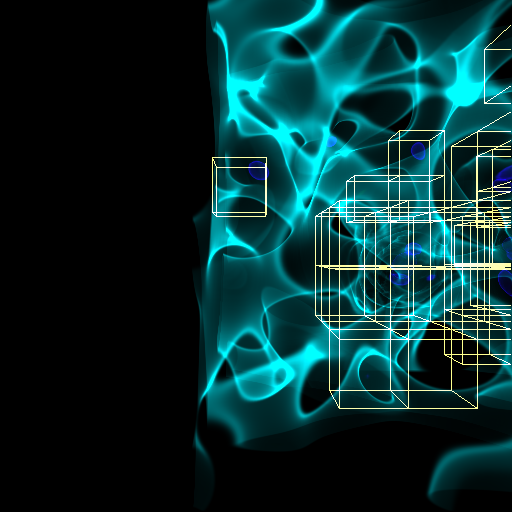

In [236]:
sc.show(sigma_clip=1.5)

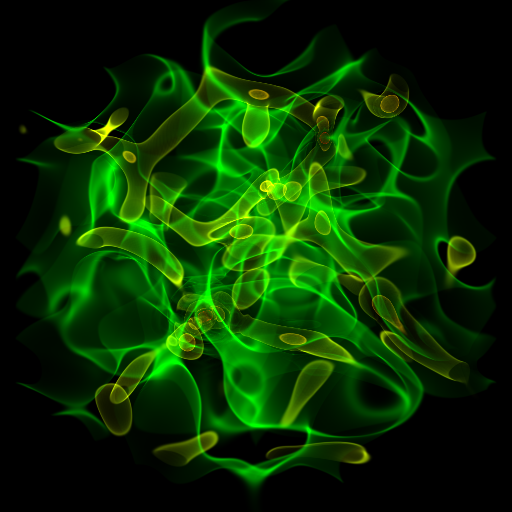

In [128]:
sc.show(sigma_clip=5.0)

yt : [INFO     ] 2022-05-13 15:12:40,828 Rendering scene (Can take a while).


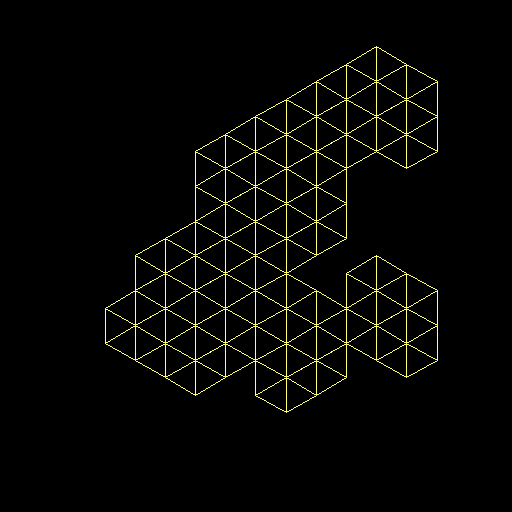

In [182]:

# Set up a custom transfer function using the TransferFunctionHelper. 
# We use 10 Gaussians evenly spaced logarithmically between the min and max
# field values.
tfh = TransferFunctionHelper(ds)
tfh.set_field(('gas', 'density'))
tfh.set_log(True)
tfh.set_bounds()
tfh.build_transfer_function()
tfh.tf.add_layers(7, colormap='inferno')

# Grab the first render source and set it to use the new transfer function
render_source = sc.get_source()
render_source.transfer_function = tfh.tf

sc.render()
sc.show(sigma_clip=4.0)

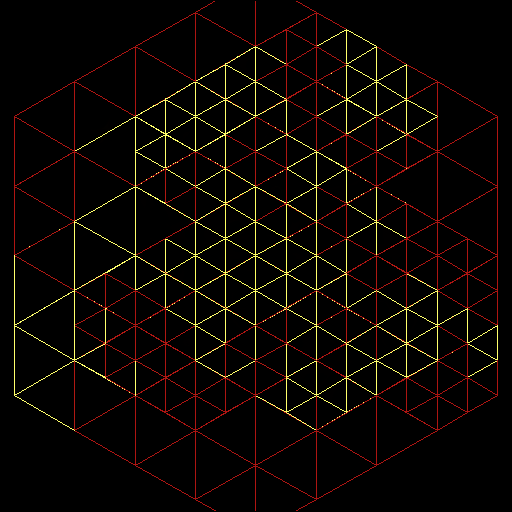

In [171]:
sc.annotate_grids(ds.all_data(), alpha=255)
sc.render()
sc.show(sigma_clip=4.0)